# input

In [2]:
import os as os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

np.random.seed(0)
labels = ['noise','outlier_1','outlier_2','outlier_3','outlier_4','outlier_5']
noise = np.random.normal(0,1,1920)
outlier = 10
x = np.linspace(0, 1919, 1920)

## line

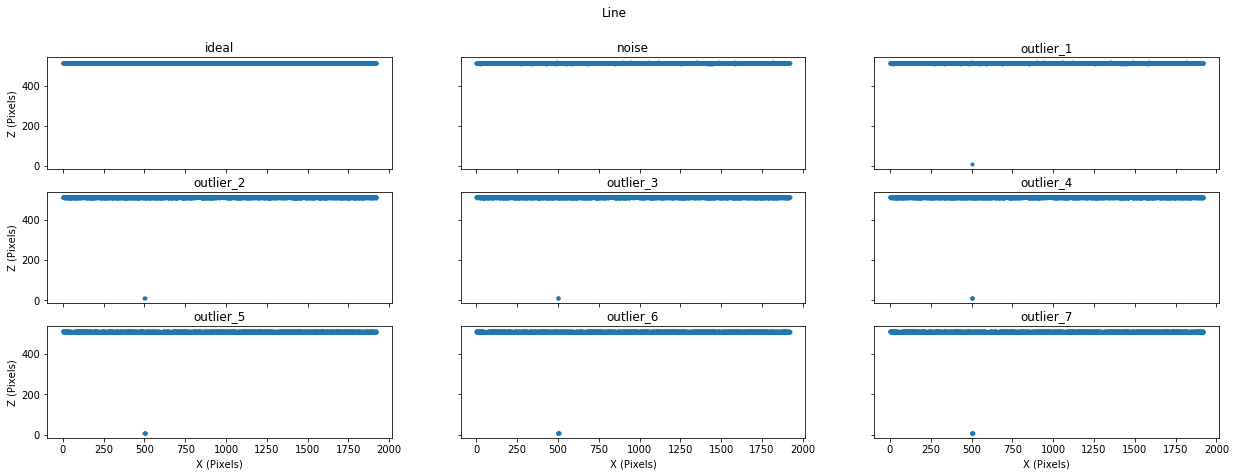

In [4]:
plt.rcParams['figure.figsize'] = [21, 7]
    
# Get Data
y = np.zeros((1920, 9))
for i in range(0, 9):
    if i == 0:
        y[:,i] = 512
    elif i == 1:
        y[:,i] = y[:,i-1] + noise
    else:
        y[:,i] = y[:,i-1]
        y[500:500+i-1,i] = outlier
       
# Plot
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
fig.suptitle('Line')
for i, ax in enumerate(axs.flat):
    ax.set(title=labels[i])
    ax.plot(x, y[:,i], '.')
    if i in [0,3,6]:
        ax.set(ylabel='Z (Pixels)')
    if i in [6,7,8]:
        ax.set(xlabel="X (Pixels)")
plt.show()

# Save
dirName = 'input/line'
try:
    os.mkdir(dirName)
except FileExistsError:
    pass
for i in range(0, 9):
    np.savetxt('./'+dirName+'/'+labels[i]+'.dat', y[:,i], delimiter='\n')

## ramp

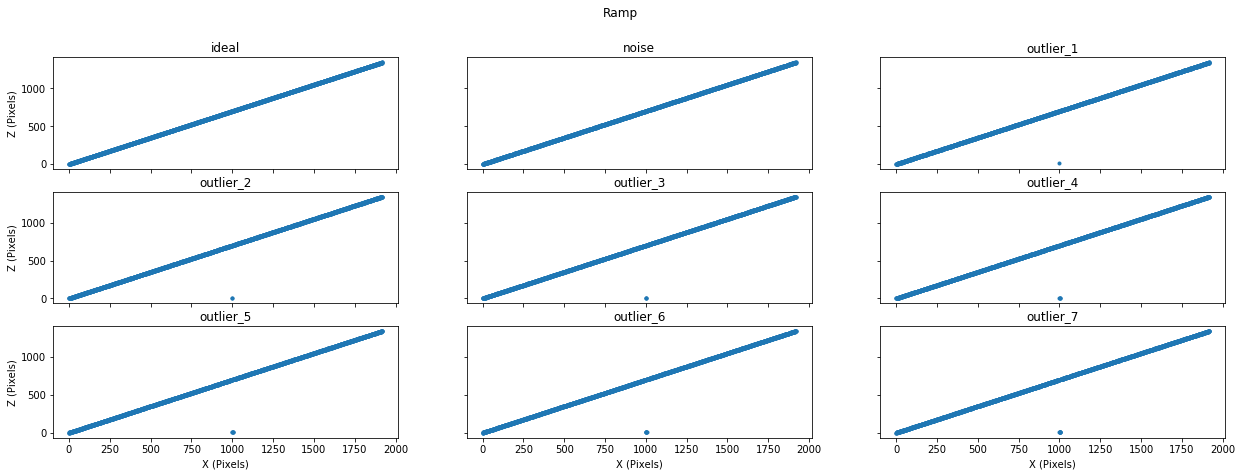

In [5]:
plt.rcParams['figure.figsize'] = [21, 7]

# Get Data
y = np.zeros((1920, 9))
for i in range(0, 9):
    if i == 0:
        y[:,i] = 0.7 * x
    elif i == 1:
        y[:,i] = y[:,i-1] + noise
    else:
        y[:,i] = y[:,i-1]
        y[1000:1000+i-1,i] = outlier

# Plot
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
fig.suptitle('Ramp')
for i, ax in enumerate(axs.flat):
    ax.set(title=labels[i])
    ax.plot(x, y[:,i], '.')
    if i in [0,3,6]:
        ax.set(ylabel='Z (Pixels)')
    if i in [6,7,8]:
        ax.set(xlabel="X (Pixels)")
plt.show()

# Save
dirName = 'input/ramp'
try:
    os.mkdir(dirName)
except FileExistsError:
    pass
for i in range(0, 9):
    np.savetxt('./'+dirName+'/'+labels[i]+'.dat', y[:,i], delimiter='\n')

## hc

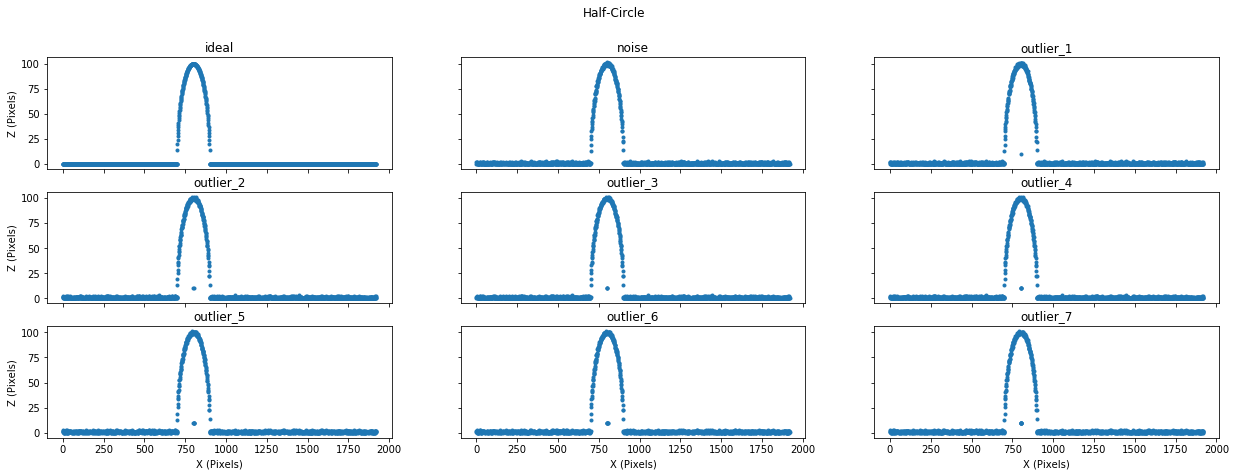

In [6]:
plt.rcParams['figure.figsize'] = [21, 7]

# Get Data
y = np.zeros((1920, 9))
for i in range(0, 9):
    if i == 0:
        y[700:901,i] = np.sqrt(np.square(100) - np.square(x[700:901] - 800))
    elif i == 1:
        y[:,i] = np.abs(y[:,i-1] + noise)
    else:
        y[:,i] = y[:,i-1]
        y[800:800+i-1,i] = outlier
        
# Plot
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
fig.suptitle('Half-Circle')
for i, ax in enumerate(axs.flat):
    ax.set(title=labels[i])
    ax.plot(x, y[:,i], '.')
    if i in [0,3,6]:
        ax.set(ylabel='Z (Pixels)')
    if i in [6,7,8]:
        ax.set(xlabel="X (Pixels)")
plt.show()

# Save
dirName = 'input/hc'
try:
    os.mkdir(dirName)
except FileExistsError:
    pass
for i in range(0, 9):
    np.savetxt('./'+dirName+'/'+labels[i]+'.dat', y[:,i], delimiter='\n')

## dhc

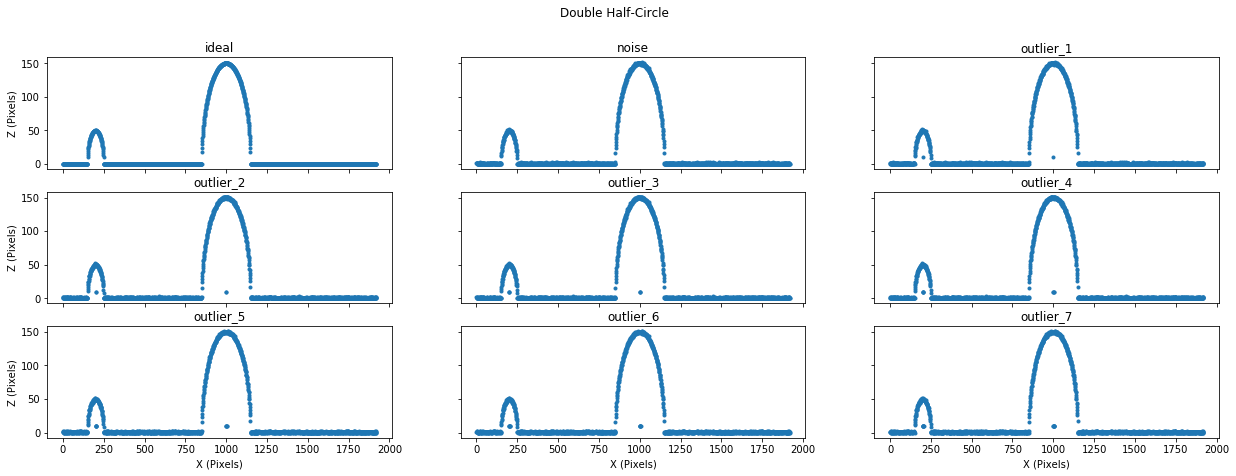

In [7]:
plt.rcParams['figure.figsize'] = [21, 7]

# Get Data
y = np.zeros((1920, 9))
for i in range(0, 9):
    if i == 0:
        y[150:251,i] = np.sqrt(np.square(50) - np.square(x[150:251] - 200))
        y[850:1151,i] = np.sqrt(np.square(150) - np.square(x[850:1151] - 1000))
    elif i == 1:
        y[:,i] = np.abs(y[:,i-1] + noise)
    else:
        y[:,i] = y[:,i-1]
        y[200:200+i-1,i] = outlier
        y[1000:1000+i-1,i] = outlier
        
# Plot
fig, axs = plt.subplots(3, 3, sharex=True, sharey=True)
fig.suptitle('Double Half-Circle')
for i, ax in enumerate(axs.flat):
    ax.set(title=labels[i])
    ax.plot(x, y[:,i], '.')
    if i in [0,3,6]:
        ax.set(ylabel='Z (Pixels)')
    if i in [6,7,8]:
        ax.set(xlabel="X (Pixels)")
plt.show()

# Save
dirName = 'input/dhc'
try:
    os.mkdir(dirName)
except FileExistsError:
    pass
for i in range(0, 9):
    np.savetxt('./'+dirName+'/'+labels[i]+'.dat', y[:,i], delimiter='\n')

## real

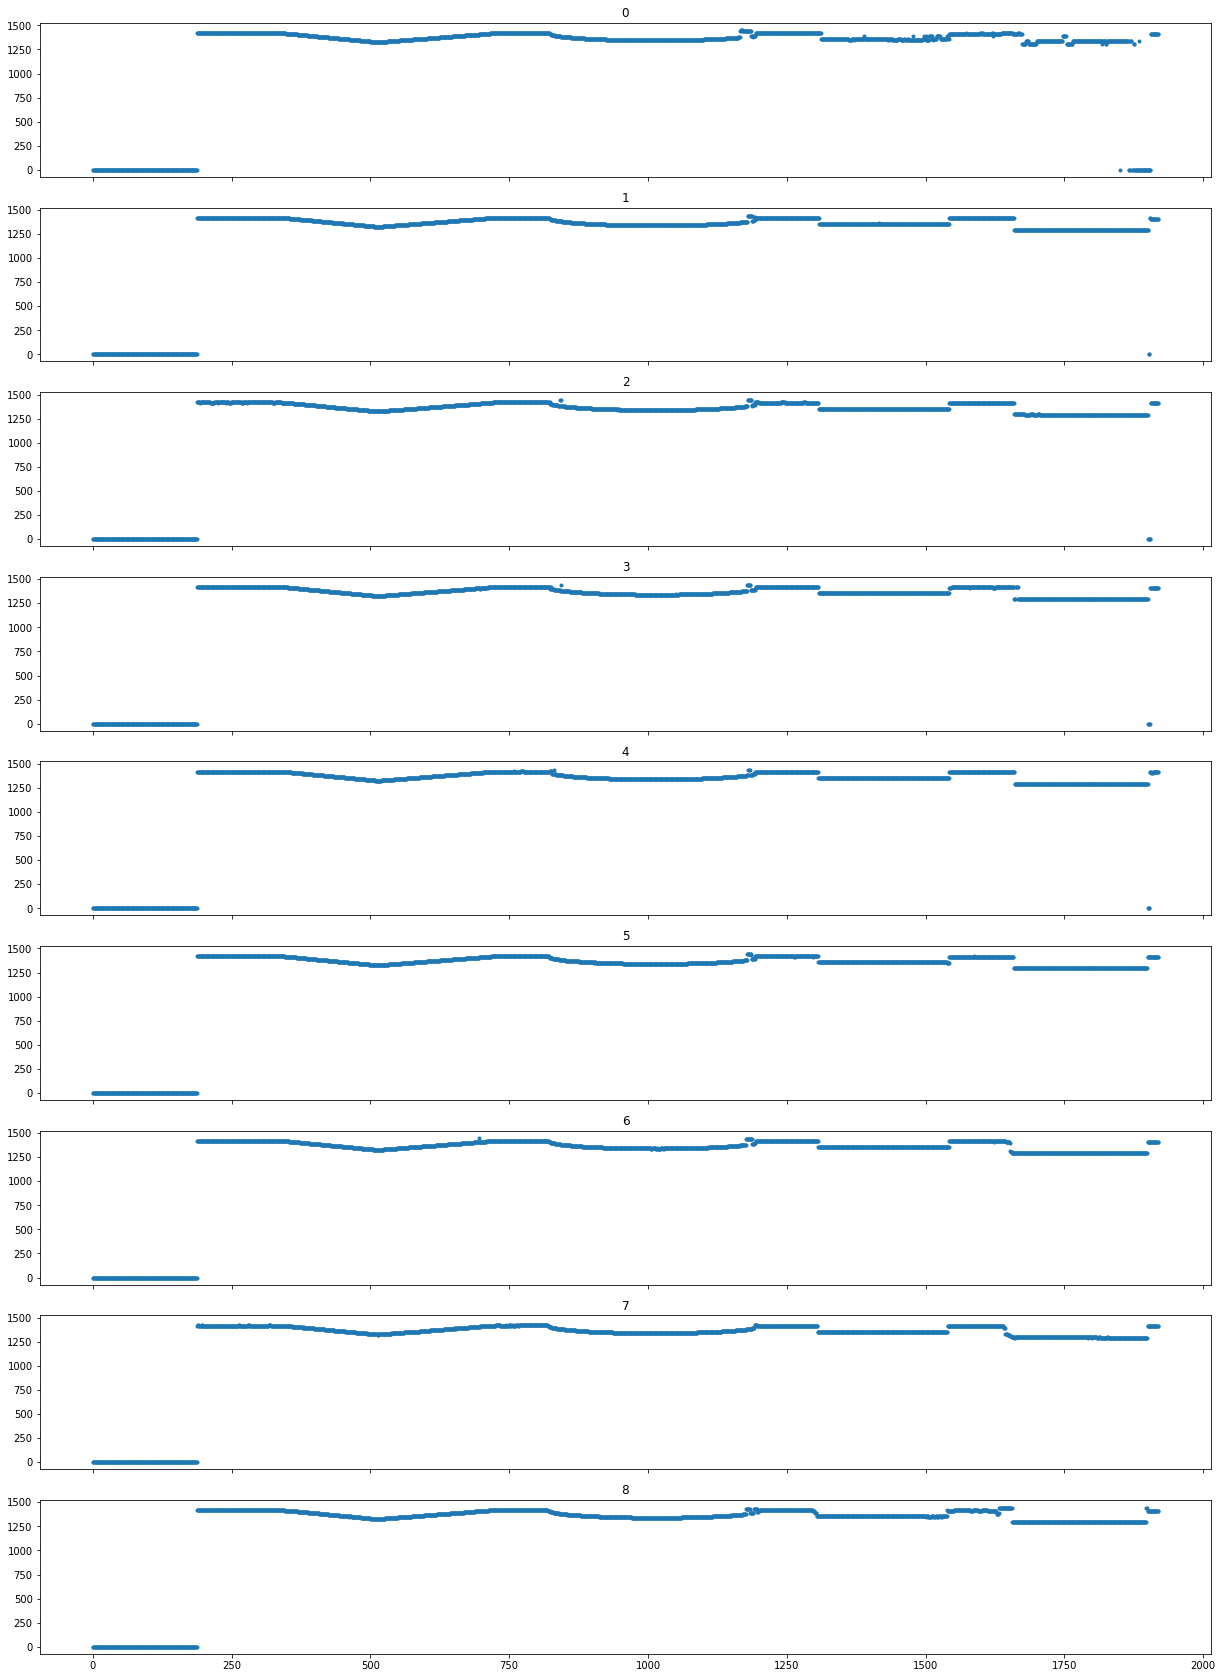

In [11]:
plt.rcParams['figure.figsize'] = [21, 30]

data = np.load('./input/real/cognex_data.npy')
    
# Plot
fig, axs = plt.subplots(9, 1, sharex=True, sharey=True)
for i, ax in enumerate(axs.flat):
    ax.set(title=str(i))
    ax.plot(x, data[i*20,:], '.')
plt.show()

# Save
dirName = 'input/real'
try:
    os.mkdir(dirName)
except FileExistsError:
    pass
for i in range(0, 10):
    np.savetxt('./'+dirName+'/profile_'+str(i)+'.dat', data[i,:], delimiter='\n')